In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Data Loading

In [31]:
customers = pd.read_csv('data/Customers.csv')
products = pd.read_csv('data/Products.csv')
transactions = pd.read_csv('data/Transactions.csv')

In [33]:
merged_data = pd.merge(transactions, customers, 'left', on='CustomerID')
merged_data = pd.merge(merged_data, products, 'left', on='ProductID')
merged_data['Price'] = merged_data['Price_x']
merged_data.drop(columns=['Price_x', 'Price_y'], inplace=True)

## Prepare Features

In [36]:
customer_new = customers.copy()
for cat in products.Category.unique():
    df = merged_data[merged_data.Category==cat].groupby(['CustomerID'])['TotalValue'].sum().reset_index()
    df = df.rename(columns={'TotalValue': f'{cat}_TotalValue'})
    customer_new = pd.merge(customer_new, df, 'left', on='CustomerID', )
customer_new = customer_new.fillna(0)
customer_new.head(4)

,CustomerID,CustomerName,Region,SignupDate,Books_TotalValue,Electronics_TotalValue,Home Decor_TotalValue,Clothing_TotalValue
0,C0001,Lawrence Carroll,South America,2022-07-10,114.60,2827.30,412.62,0.00
1,C0002,Elizabeth Lutz,Asia,2022-02-13,0.00,0.00,837.28,1025.46
2,C0003,Michael Rivera,South America,2024-03-07,0.00,1385.20,1217.82,122.36
3,C0004,Kathleen Rodriguez,South America,2022-10-09,1888.48,1355.74,2110.66,0.00


In [38]:
for cat in products.Category.unique():
    df = merged_data[merged_data.Category==cat].groupby(['CustomerID'])['Quantity'].sum().reset_index()
    df = df.rename(columns={'Quantity': f'{cat}_Quantity'})
    customer_new = pd.merge(customer_new, df, 'left', on='CustomerID')
customer_new = customer_new.fillna(0)
customer_new.head(4)

,CustomerID,CustomerName,Region,SignupDate,Books_TotalValue,Electronics_TotalValue,Home Decor_TotalValue,Clothing_TotalValue,Books_Quantity,Electronics_Quantity,Home Decor_Quantity,Clothing_Quantity
0,C0001,Lawrence Carroll,South America,2022-07-10,114.60,2827.30,412.62,0.00,2.0,7.0,3.0,0.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,0.00,0.00,837.28,1025.46,0.0,0.0,6.0,4.0
2,C0003,Michael Rivera,South America,2024-03-07,0.00,1385.20,1217.82,122.36,0.0,4.0,6.0,4.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,1888.48,1355.74,2110.66,0.00,8.0,6.0,9.0,0.0


In [40]:
# One Hot Encoding
customer_new = pd.get_dummies(customer_new, columns=['Region'], dtype='int')
customer_new.head(4)

,CustomerID,CustomerName,SignupDate,Books_TotalValue,Electronics_TotalValue,Home Decor_TotalValue,Clothing_TotalValue,Books_Quantity,Electronics_Quantity,Home Decor_Quantity,Clothing_Quantity,Region_Asia,Region_Europe,Region_North America,Region_South America
0,C0001,Lawrence Carroll,2022-07-10,114.60,2827.30,412.62,0.00,2.0,7.0,3.0,0.0,0,0,0,1
1,C0002,Elizabeth Lutz,2022-02-13,0.00,0.00,837.28,1025.46,0.0,0.0,6.0,4.0,1,0,0,0
2,C0003,Michael Rivera,2024-03-07,0.00,1385.20,1217.82,122.36,0.0,4.0,6.0,4.0,0,0,0,1
3,C0004,Kathleen Rodriguez,2022-10-09,1888.48,1355.74,2110.66,0.00,8.0,6.0,9.0,0.0,0,0,0,1


In [42]:
customer_new.drop(columns=['CustomerName', 'SignupDate'], inplace=True)
customer_new.columns

Index(['CustomerID', 'Books_TotalValue', 'Electronics_TotalValue',
       'Home Decor_TotalValue', 'Clothing_TotalValue', 'Books_Quantity',
       'Electronics_Quantity', 'Home Decor_Quantity', 'Clothing_Quantity',
       'Region_Asia', 'Region_Europe', 'Region_North America',
       'Region_South America'],
      dtype='object')

In [44]:
customer_ids = customer_new['CustomerID'].values
customer_features = customer_new.drop(columns=['CustomerID'], inplace=False).values
print(f"Feature matrix has shape - {customer_features.shape}")

Feature matrix has shape - (200, 12)


In [46]:
# standardisation
customer_features = StandardScaler().fit_transform(customer_features)

## K Means Clustering and Visualisation

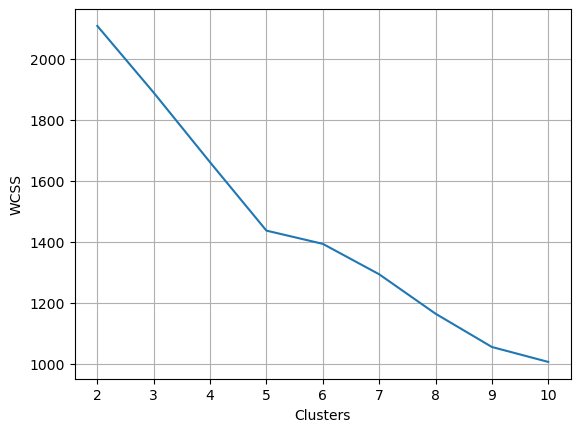

In [203]:
# Decide number of clusters
wcss = []
for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=1)
    model.fit_predict(customer_features)
    wcss.append(model.inertia_)
plt.plot(range(2,11), wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.grid()

In [205]:
K = 5
model = KMeans(n_clusters=K, random_state=1)
clusters = model.fit_predict(customer_features)
db_index = davies_bouldin_score(customer_features, clusters)
print(f"DB index for {K} clusters is {db_index}")
print(f"WCSS is - {model.inertia_}")

DB index for 5 clusters is 1.5534880873400687
WCSS is - 1436.119006457665


In [207]:
tsne = TSNE(n_components=2)
X_low = tsne.fit_transform(customer_features)

Text(0.5, 1.0, 'Low Dimensional Scater Plot for 5 clusters')

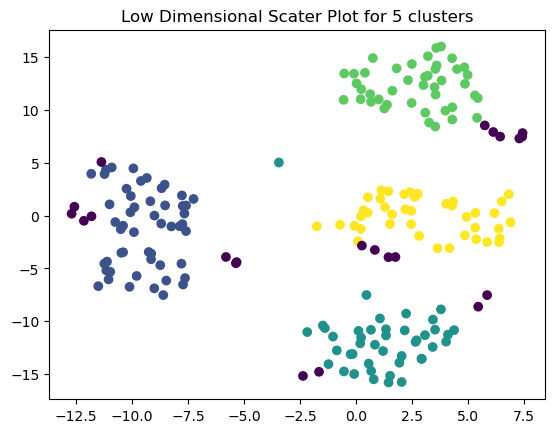

In [208]:
plt.scatter(X_low[:,0], X_low[:,1], c=clusters)
plt.title(f"Low Dimensional Scater Plot for {K} clusters")